In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def norm(x):
  return math.sqrt(x[0]**2 + x[1]**2)

In [11]:
def f(x, a):
  return x[0]**2 + a*x[1]**2

In [12]:
def f_grad(x, a):
  return np.array([2*x[0], 2*a*x[1]])

In [13]:
def back_tracking(s, alpha, betha, a, x_k):
  t = s
  f_value = f(x_k, a)
  f_grad_value = f_grad(x_k, a)

  while (f_value - f(x_k - t*f_grad_value, a) < alpha*norm(f_grad_value)**2):
    # print("condition values: ", f_value - f(x_k - t*f_grad_value, a), alpha*t*norm(f_grad_value)**2)
    t *= betha

  return t

In [14]:
def gradient_method(eps, s, alpha, betha, x_0, a):
  x_k = x_0
  k = 0
  f_value = f(x_k, a)
  f_grad_value = f_grad(x_k, a)

  while (norm(f_grad_value) > eps):
    k += 1
    t_k = back_tracking(s, alpha, betha, a, x_k)

    x_k = x_k - t_k*f_grad_value
    f_value = f(x_k, a)
    f_grad_value = f_grad(x_k, a)

    print("iter_number: ", k, " norm_grad = ", norm(-f_grad_value), " fun_val = ", f_value)
    print("---------------------------------------------------------------------------------------")

  return x_k, k

In [15]:
# eps = float(input())
# s = float(input())
# alpha = float(input())
# betha = float(input())
# x_0 = np.array(list(map(float, input().strip().split())))
# a = float(input())
x_0 = np.array([.01, 1])
gradient_method(10**(-5), 2, .25, .5, x_0, .01)
# gradient_method(eps, s, alpha, betha, x_0, a)

iter_number:  1  norm_grad =  0.02800285699709942  fun_val =  0.009703999999999999
---------------------------------------------------------------------------------------
iter_number:  2  norm_grad =  0.02772989837702259  fun_val =  0.009323681600000001
---------------------------------------------------------------------------------------
iter_number:  3  norm_grad =  0.027465195290505402  fun_val =  0.00895842380864
---------------------------------------------------------------------------------------
iter_number:  4  norm_grad =  0.0272085502927428  fun_val =  0.008607630225817856
---------------------------------------------------------------------------------------
iter_number:  5  norm_grad =  0.026959768596095533  fun_val =  0.00827072806887547
---------------------------------------------------------------------------------------
iter_number:  6  norm_grad =  0.026718658078090676  fun_val =  0.007947167237348
--------------------------------------------------------------------

(array([0.        , 0.00049166]), 201)

Streaming output truncated to the last 5000 lines.
iter_number:  1  norm_grad =  0.5038211227965753  fun_val =  0.09273001600000058
---------------------------------------------------------------------------------------
iter_number:  2  norm_grad =  0.1863364684023003  fun_val =  0.012644327286784149
---------------------------------------------------------------------------------------
iter_number:  3  norm_grad =  0.07104875051073199  fun_val =  0.0017988029784854662
---------------------------------------------------------------------------------------
iter_number:  4  norm_grad =  0.032084896576299406  fun_val =  0.000330058694558417
---------------------------------------------------------------------------------------
iter_number:  5  norm_grad =  0.007928014845247569  fun_val =  2.2972741003825214e-05
---------------------------------------------------------------------------------------
iter_number:  6  norm_grad =  0.0029175094630511126  fun_val =  3.1110604777020415e-06
-----

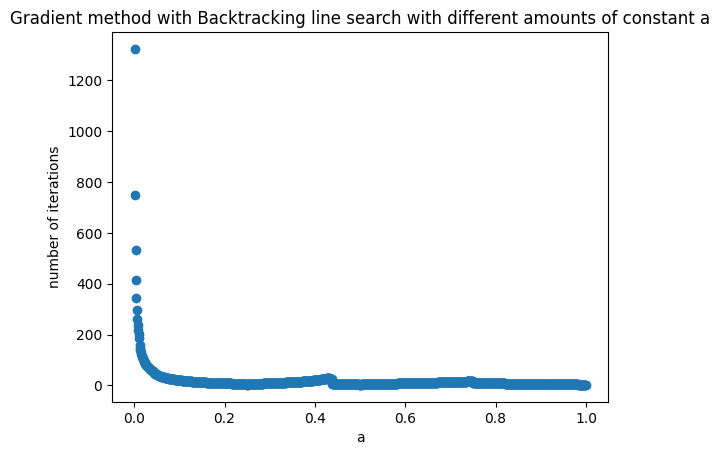

In [16]:
a = .001
X = []
y = []

while(a <= 1):
    x_k, k = gradient_method(10**(-5), 2, .25, .5, x_0, a)
    X.append(a)
    y.append(k)
    a += 1/1000

print(y)
print(len(y))

plt.xlabel('a')
plt.ylabel('number of iterations')
plt.title('Gradient method with Backtracking line search with different amounts of constant a')

plt.scatter(X, y)
plt.show()